# Project Plan

* Intro - explain the 2 datasets, tidy or not, summary statisctics
* state broad question and then specific question

Frank Wood and his research time collected data about how people play video games through opening a Minecraft server. There are 2 sets of data collected from this experiment. The first data is a data about the players which collects data about their experience in gaming, categorizing them by amateur, beginner, pro, veteran, regular, whether they are subscribed to gaming newsletters, their hashed emails, played hours, their name, gender, and age. In the other data, it records the players gaming sessions, so it includes their start time, end time, and original start time and original end time. From these two data, I will be using the sessions data to answer what time windows are most likely to have many simultaneously players more specifically which day of the week and what time of the day is likely to have the greatest number of simultaneous players. 
data description information - MAYBE ADD THIS TO WHEN I EXPLAIN THE DATA ABOVE
-	Player dataset is already tidy as it follows the three rules

In [80]:
library(tidyverse)
library(lubridate)

player_information <- read_csv("players.csv")
player_information

game_sessions <- read_csv("sessions.csv")
game_sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


how will I plan to wrangle to data to answer the question - to answer question I need to break start time and end time into components -> year, day, time and duration

In [81]:
sessions_wrangle <- game_sessions |>
    mutate(start_time = dmy_hm(start_time),
           end_time = dmy_hm(end_time),
           duration_mins = as.numeric(difftime(end_time, start_time, units = "mins"))) |>
    filter(!is.na(start_time), !is.na(end_time)) |>
    filter(duration_mins > 0)

session_hours <- sessions_wrangle |>
    mutate(start_hour = floor_date(start_time, "hour"),
           end_hour = floor_date(end_time, "hour")) |>
    rowwise()|>
    mutate(hour = list(seq(start_hour, end_hour, by = "hour"))) |>
    unnest(hour) |>
    ungroup()
session_hours

hashedEmail,start_time,end_time,original_start_time,original_end_time,duration_mins,start_hour,end_hour,hour
<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,1.71977e+12,1.71977e+12,12,2024-06-30 18:00:00,2024-06-30 18:00:00,2024-06-30 18:00:00
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,1.71867e+12,1.71867e+12,13,2024-06-17 23:00:00,2024-06-17 23:00:00,2024-06-17 23:00:00
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,1.72193e+12,1.72193e+12,23,2024-07-25 17:00:00,2024-07-25 17:00:00,2024-07-25 17:00:00
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00,1.72188e+12,1.72188e+12,36,2024-07-25 03:00:00,2024-07-25 03:00:00,2024-07-25 03:00:00
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,2024-05-25 16:12:00,1.71665e+12,1.71665e+12,11,2024-05-25 16:00:00,2024-05-25 16:00:00,2024-05-25 16:00:00
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,2024-06-23 17:10:00,1.71916e+12,1.71916e+12,122,2024-06-23 15:00:00,2024-06-23 17:00:00,2024-06-23 15:00:00
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,2024-06-23 17:10:00,1.71916e+12,1.71916e+12,122,2024-06-23 15:00:00,2024-06-23 17:00:00,2024-06-23 16:00:00
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,2024-06-23 17:10:00,1.71916e+12,1.71916e+12,122,2024-06-23 15:00:00,2024-06-23 17:00:00,2024-06-23 17:00:00
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-04-15 07:12:00,2024-04-15 07:21:00,1.71317e+12,1.71317e+12,9,2024-04-15 07:00:00,2024-04-15 07:00:00,2024-04-15 07:00:00


In [82]:
players_by_hour <- sessions_expanded |>
  mutate(hour_of_day = hour(hour)) |>
  count(hour_of_day, name = "num_of_players") |>
  arrange(hour_of_day)
players_by_hour

players_by_hour |> 
arrange(desc(num_of_players))|> 
slice(1)

hour_of_day,num_of_players
<int>,<int>
0,220
1,188
2,235
3,270
4,278
5,204
6,145
7,115
8,44


hour_of_day,num_of_players
<int>,<int>
4,278


In [83]:
sessions_expanded |>
    summarize(mean_duration = mean(duration_mins, na.rm = TRUE))

mean_duration
<dbl>
79.40343


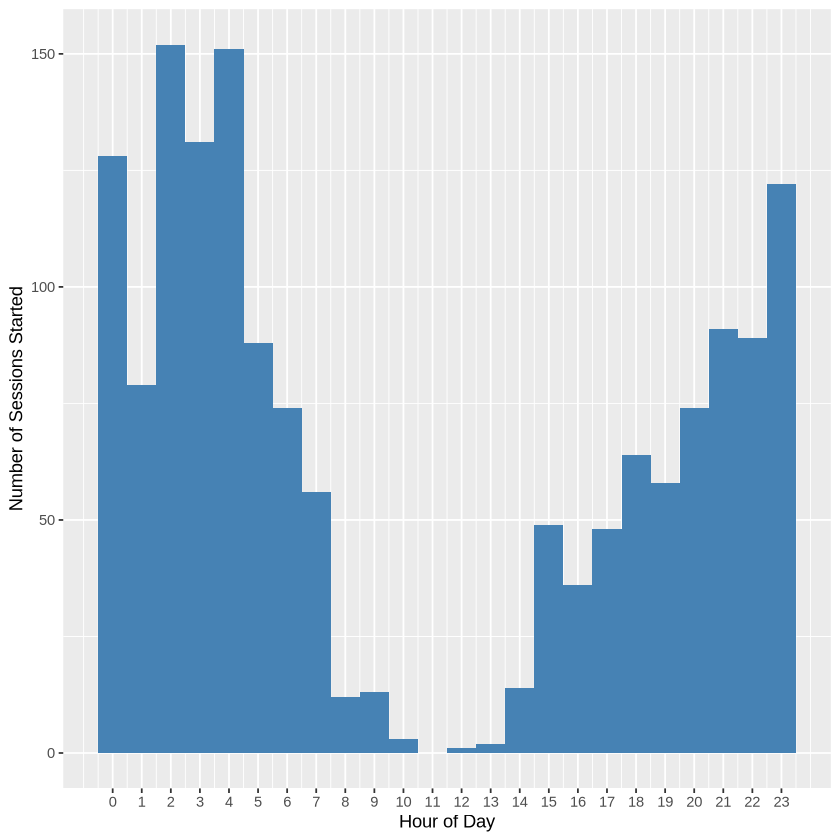

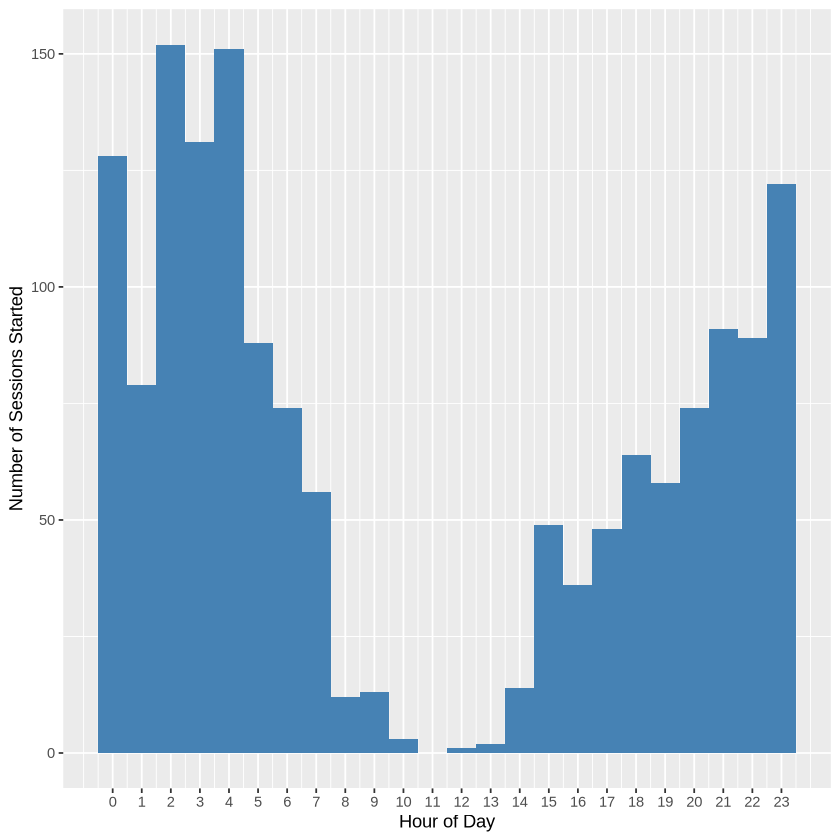

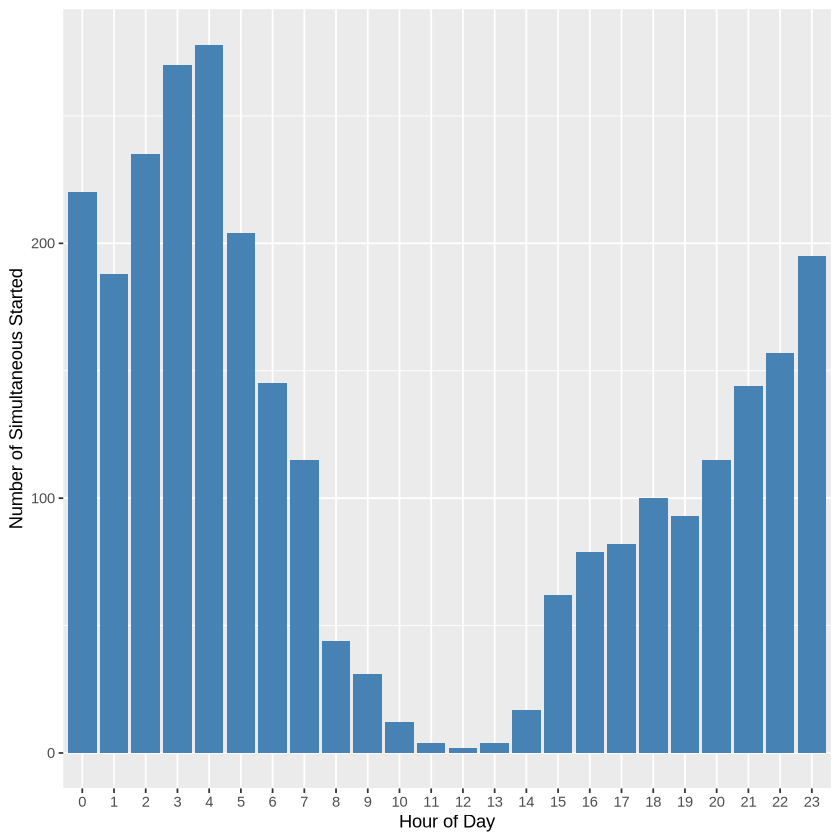

In [84]:
game_sessions |> 
  mutate(hour = hour(dmy_hm(start_time))) |>
  ggplot(aes(x = hour)) +
  geom_histogram(binwidth = 1, fill = "steelblue") +
  scale_x_continuous(breaks = 0:23) +
  labs(x = "Hour of Day", y = "Number of Sessions Started")
game_sessions_plot

players_by_hour |>
  ggplot(aes(x = factor(hour_of_day), y = num_of_players)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(x = "Hour of Day", y = "Number of Simultaneous Started")

* explain the outcome and the 2 graphs (for comparison, started vs simultaneous - mention the average duration 1 hr 20 mins)

add methods + plan - multivariable KNN regression and why this will work
Why is this method appropriate? – data is most likely not linear as it is timestamps and cyclic ex. day of the week or hour of day etc. They will most likely be a difference in simulataneous players because everyone is on a different schedule 10 year old vs 20 year old
We will also use a regression > classification because our outcome is numerical (number of simultaneous players)
Which assumptions are required, if any, to apply the method selected? (look for assumptions stated in textbook)
What are the potential limitations or weaknesses of the method selected?
How are you going to compare and select the model? 
How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation? Will split data into 2 has the data set is quite big (1535 observations) – will split 75 training 25 testing. KNN regression model we have learned – creating cross fold, tuning, choosing average lowest RMSE as the K (because this is regression)